<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details:
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source:
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References:
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

import seaborn as sns

### 1. Import the data

In [2]:
# csv_file = 'ais.csv'

# Import and view data
ais = pd.read_csv('/Users/stephanienduaguba/Documents/DATA/ais.csv', index_col=0)
ais.head()

rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt sex  \
1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  78.9   f   
2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  74.4   f   
3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  69.1   f   
4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  74.9   f   
5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  64.6   f   

    sport  
1  B_Ball  
2  B_Ball  
3  B_Ball  
4  B_Ball  
5  B_Ball

### 2. Do some EDA of relationships between features.

In [3]:
# Datatypes
ais.dtypes

rcc       float64
wcc       float64
hc        float64
hg        float64
ferr        int64
bmi       float64
ssf       float64
pcBfat    float64
lbm       float64
ht        float64
wt        float64
sex        object
sport      object
dtype: object

In [4]:
# Describe data
ais.describe().T

count        mean        std     min       25%      50%      75%  \
rcc     202.0    4.718614   0.457976    3.80    4.3725    4.755    5.030   
wcc     202.0    7.108911   1.800337    3.30    5.9000    6.850    8.275   
hc      202.0   43.091584   3.662989   35.90   40.6000   43.500   45.575   
hg      202.0   14.566337   1.362451   11.60   13.5000   14.700   15.575   
ferr    202.0   76.876238  47.501239    8.00   41.2500   65.500   97.000   
bmi     202.0   22.955891   2.863933   16.75   21.0825   22.720   24.465   
ssf     202.0   69.021782  32.565333   28.00   43.8500   58.600   90.350   
pcBfat  202.0   13.507426   6.189826    5.63    8.5450   11.650   18.080   
lbm     202.0   64.873713  13.070197   34.36   54.6675   63.035   74.750   
ht      202.0  180.103960   9.734494  148.90  174.0000  179.700  186.175   
wt      202.0   75.007921  13.925199   37.80   66.5250   74.400   84.125   

           max  
rcc       6.72  
wcc      14.30  
hc       59.70  
hg       19.20  
ferr    234.00  
bmi      34.42  
ssf     200.80  
pcBfat   35.52  
lbm     106.00  
ht      209.40  
wt      123.20

In [5]:
# Check for missing values
ais.isnull().sum()

rcc       0
wcc       0
hc        0
hg        0
ferr      0
bmi       0
ssf       0
pcBfat    0
lbm       0
ht        0
wt        0
sex       0
sport     0
dtype: int64

In [6]:
# Count of unique values for 'sex' variable
ais['sex'].value_counts()

sex
m    102
f    100
Name: count, dtype: int64

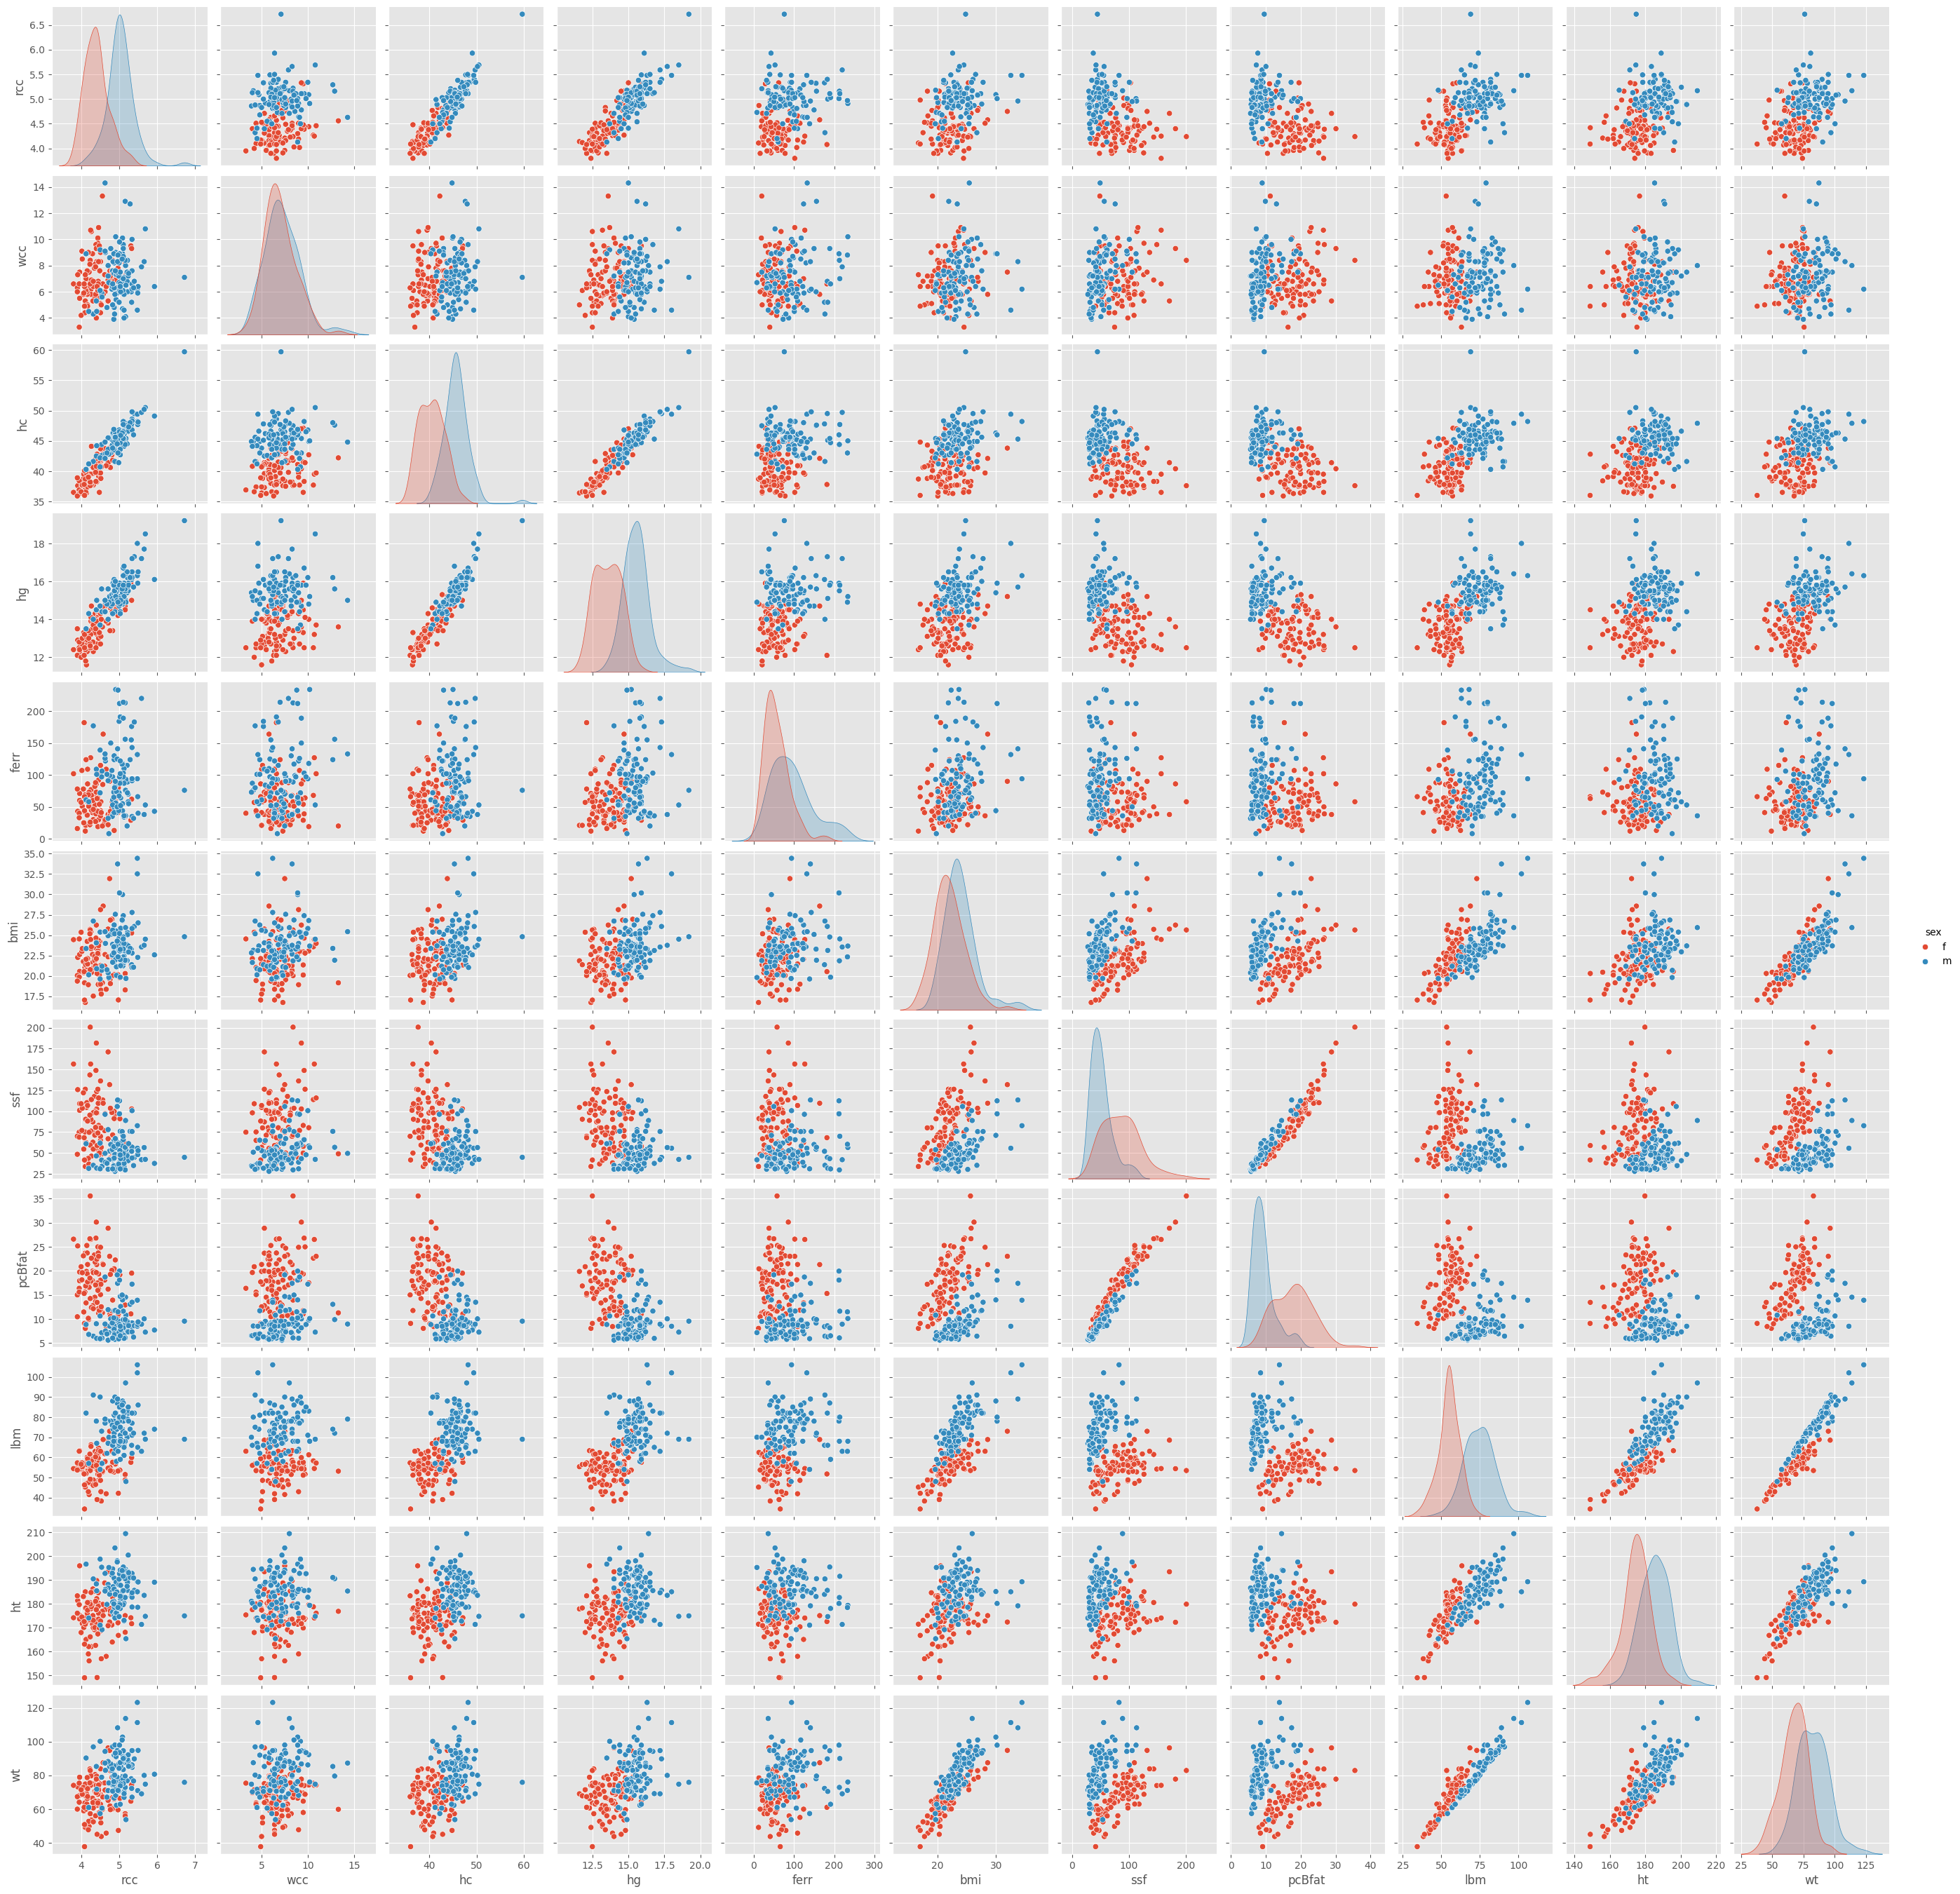

In [7]:
# Relationships and distribution between features based on 'sex' variable
sns.pairplot(data=ais, hue='sex');

From the plot, noticeable clusters can be seen, particularly distinguishing between males (depicted in blue) and females (depicted in orange).

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [8]:
# ANSWER
# Drop 'sex' and 'sport' 
X = ais.drop(['sex', 'sport'], axis = 1)

In [9]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data (X) and transform the data to have zero mean and unit variance
Xss = scaler.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [10]:
# ANSWER
# Specify the number of clusters (k = 2 in this case)
k = 2

# Create an instance of KMeans with the specified number of clusters
k_mean2 = KMeans(n_clusters=k, n_init=10) 
# 'n_init' is the number of times the algorithm will run with different centroid seeds

# Fit the KMeans model to the standardized data (Xss)
k_mean2.fit(Xss)

KMeans(n_clusters=2, n_init=10)

In [11]:
# ANSWER
# Specify the number of clusters (k = 4 in this case)
k = 4

# Create an instance of KMeans with the specified number of clusters
k_mean4 = KMeans(n_clusters=k, n_init=10) 

# Fit the KMeans model to the standardized data (Xss)
k_mean4.fit(Xss)

KMeans(n_clusters=4, n_init=10)

### 5. Get the labels for the models

In [12]:
# ANSWER
# Labels for 2 Clusters
labels_2 = k_mean2.labels_
print(labels_2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
# ANSWER
# Labels for 4 Clusters
labels_4 = k_mean4.labels_
print(labels_4)

[2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 0 0 2 2 0 0 0 0 0 0 1 2 2 2 2 1
 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 3 1 3 1
 1 3 3 3 1 3 3 3 3 0 3 3 3 3 3 3 3 3 1 3 3 3 3 3 1 3 1 1 1 0 1 1 1 3 3 1 1
 1 1 1 1 0 1 0 1 1 1 1 3 1 3 3 1 3 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 3 3 3 3
 3 3 1 3 3 1 3 1 3 3 3 1 3 1 1 1 1]


### 6. Elbow Method For Optimal k

For each k value, we will initialize k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [14]:
# ANSWER
# Calculate the sum of squared distances for different values of k
Sum_of_squared_distances = []

# Iterate over a range of k values (from 1 to 14)
K = range(1, 15)

# For each k, fit the KMeans model, calculate the sum of squared distances, and append it to the list
for k in K:
    # Create an instance of KMeans with the specified number of clusters
    km = KMeans(n_clusters=k, n_init=10)
    
    # Fit the KMeans model to the standardized data (Xss)
    km = km.fit(Xss)
    
    # Append the sum of squared distances to the list
    Sum_of_squared_distances.append(km.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

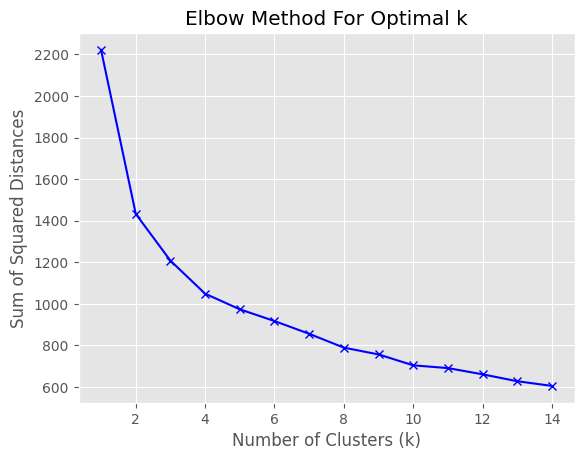

In [15]:
# ANSWER
# Plot the elbow method graph
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

Each time, compare to the actual species classification.

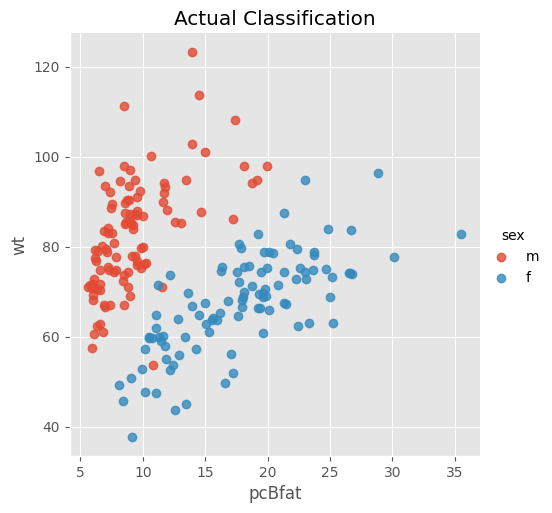

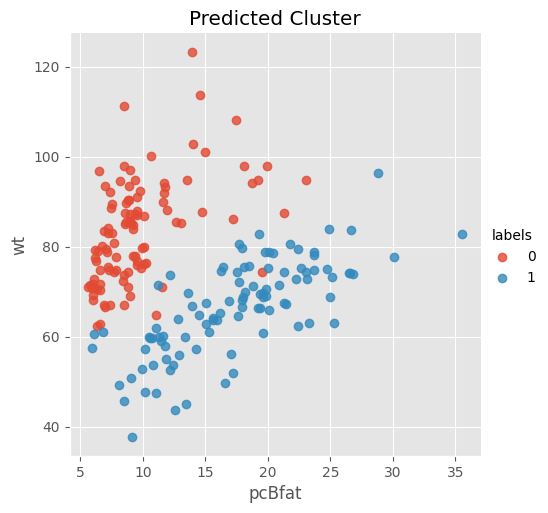

In [16]:
# ANSWER
# Create a copy of the dataset with labels_2
ais_labels = ais.copy()
ais_labels['labels'] = labels_2

# Scatter plot for actual classification
sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='sex',
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

# Scatter plot for predicted cluster
sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels',
           fit_reg=False)
plt.title('Predicted Cluster')
plt.show()

[[11.9698     93.252     ]
 [11.82595238 56.57142857]
 [21.04362069 72.80862069]
 [ 7.93826923 74.80961538]]


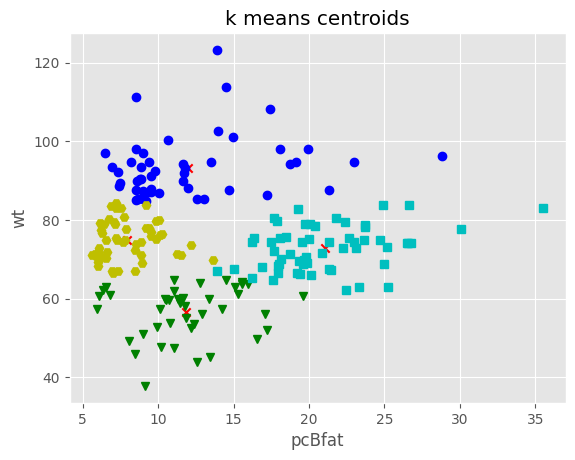

In [17]:
# KMeans clustering algorithm on the 'pcBfat' and 'wt' features where K = 4

# Extracting features
x1 = np.array(ais['pcBfat'])
x2 = np.array(ais['wt'])

# Create a plot and organize data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'c', 'y']
markers = ['o', 'v', 's', 'H']

# Applying KMeans algorithm
K = 4
kmeans_model = KMeans(n_clusters=K, n_init=10).fit(X)

# Displaying cluster centers
print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

# Plotting
plt.plot()
plt.title('k means centroids')
plt.xlabel('pcBfat')
plt.ylabel('wt')

# Plotting data points with assigned clusters
for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')

# Plotting cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='r')
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



